# 단어 임베딩
- 감성 분석을 수행하며 단어 임베딩 생성

In [33]:
import numpy as np
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
%config InlineBackend.figure_format = 'retina'


# 10개의 문장으로 구성된 문서 정의
docs = np.array(['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.'])
# 감성 레이블 1: 긍정, 0: 부정
labels = np.array([1,1,1,1,1,0,0,0,0,0])

# 토큰화
vocab_size = 20 # 충분히 큰 숫자를 지정한다
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(docs)

# 문장을 인코딩
encoded_docs = tokenizer.texts_to_sequences(docs)
print(encoded_docs)


[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


In [35]:
# 토큰화 결과 보기 (인코딩 결과가 딕셔너리에 저장됨)
tokenizer.word_index

{'better': 14,
 'could': 12,
 'done': 2,
 'effort': 4,
 'excellent': 9,
 'good': 3,
 'great': 7,
 'have': 13,
 'nice': 8,
 'not': 11,
 'poor': 5,
 'weak': 10,
 'well': 6,
 'work': 1}

In [36]:
# 문장의 길이를 가장 긴 4 단어로 맞춤 (패딩)
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [37]:
# 단어 임베딩 얻기. 케라스의 Embedding() 사용
# 임베딩 벡터 크기를 8로 지정
# 감성 분류(이진 분류)를 위해서 로지스틱 회귀 사용
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length, name='embeddings'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(padded_docs, labels, epochs=50, verbose=0)

# 임베딩 벡터 저장
embeddings = model.get_layer('embeddings').get_weights()[0]
w2v_my = {}

for word, index in tokenizer.word_index.items():
    w2v_my[word] = embeddings[index]

print(w2v_my)

{'work': array([ 0.03338187,  0.02890731, -0.06290624,  0.07967303,  0.06978413,
       -0.05083824,  0.05157545, -0.04204298], dtype=float32), 'done': array([ 0.07553969,  0.07773639, -0.07216284,  0.01046565, -0.04502609,
       -0.04864708,  0.10027366, -0.05961209], dtype=float32), 'good': array([-0.01242673, -0.0673933 ,  0.04230712,  0.01820541, -0.08363136,
        0.0871869 , -0.01438637,  0.08850159], dtype=float32), 'effort': array([ 0.00864481, -0.09041593,  0.00069677, -0.01304612, -0.06264058,
        0.05779323, -0.00331549, -0.00631199], dtype=float32), 'poor': array([ 0.06914441,  0.04420276, -0.02048748, -0.03990904, -0.00544797,
       -0.01495453,  0.05756018, -0.08631419], dtype=float32), 'well': array([-0.03313544, -0.04893695,  0.01825487,  0.02356319,  0.09365205,
        0.0191354 , -0.0913894 ,  0.01857515], dtype=float32), 'great': array([-0.00584964, -0.01570915, -0.02513573,  0.0538801 ,  0.0905799 ,
        0.05697586, -0.01173427,  0.07852455], dtype=float

In [38]:
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 80.000001


In [45]:
# 임의의 단어 조합을 입력
# good great, weak poor work
model.predict([[3, 7, 0, 0], [10,5,1,0]])

array([[0.53361726],
       [0.49767753]], dtype=float32)

## (연습) 임베딩 벡터 차원을 2로 설정하고 학습시킨 단어의 임베딩 벡터를 2차원 평면에 산포도로 그리시오

In [47]:
model = Sequential()
model.add(Embedding(vocab_size, 2, input_length=max_length, name='embeddings'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_docs, labels, epochs=50, verbose=0)
embeddings = model.get_layer('embeddings').get_weights()[0]
w2v_my = {}
for word, index in tokenizer.word_index.items():
    w2v_my[word] = embeddings[index]

In [48]:
import pandas as pd
df = pd.DataFrame(w2v_my).T
df.columns = [list('xy')]
df

,x,y
work,0.005923,0.046087
done,0.019766,0.092266
good,0.078624,-0.031080
effort,-0.023274,0.006893
poor,-0.016444,0.069732
well,0.072263,-0.056393
great,0.039220,-0.023186
nice,0.052692,-0.020751
excellent,0.062390,-0.044415
weak,-0.045216,0.021449


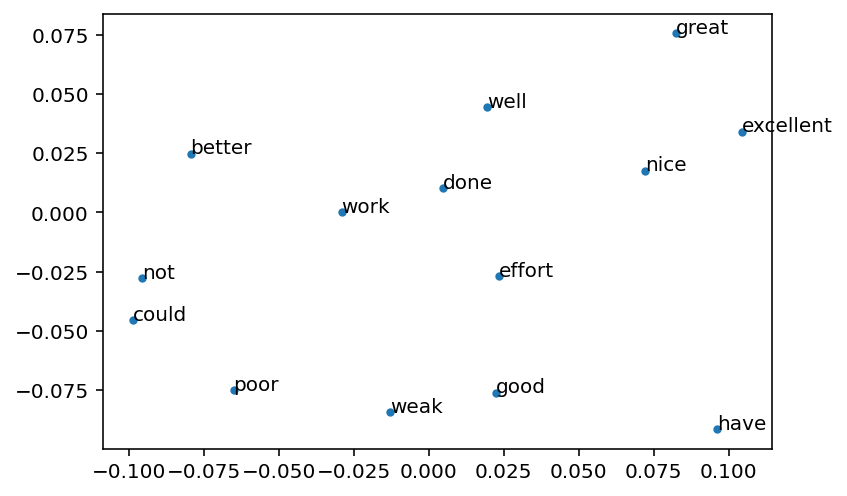

In [32]:
import matplotlib.pyplot as plt
plt.scatter(df.x, df.y, s=10)
for i in range(len(df)):
  plt.text(df.x.iloc[i], df.y.iloc[i], df.index[i])